In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from citipy import citipy

#import & read csv
firedata_csv="../source_data/trimmed_and_cleaner_wildland_fire.csv"
firedata_df=pd.read_csv(firedata_csv)

firedata_df.head()

,Unnamed: 0,Index,Fire ID,Cause,Latitude,Longitude,Country,State,Acres Burned,Discovery Year,Discovery Month,Discovery Day,Out Year,Out Month,Out Day
0,0,1,2020-MTLG42-000224,Human,45.785037,-104.457511,US,MT,50.6,2020,8,6,2020,8,6
1,2,3,2017-MTNWS-000878,Human,48.073946,-114.835414,US,MT,50.0,2017,10,17,2017,10,17
2,5,6,2020-MSMNF-000308,Human,31.068196,-89.069725,US,MS,1.0,2020,11,23,2020,11,23
3,6,7,2019-UTUWF-000883,Unknown,40.072836,-111.414812,US,UT,170.0,2019,10,26,2019,10,26
4,7,8,2020-MTCES-006641,Natural,44.637596,-111.575112,US,MT,0.1,2020,8,27,2020,8,27


In [6]:
# Sum Acreage by Fire Cause for all of US
cause_group = firedata_df.groupby("Cause")
cause_group_df = pd.DataFrame(cause_group["Acres Burned"].sum())
cause_group_df


,Acres Burned
Cause,
Human,8.295685e+06
Natural,2.479570e+07
Undetermined,2.751089e+06
Unknown,6.311720e+06


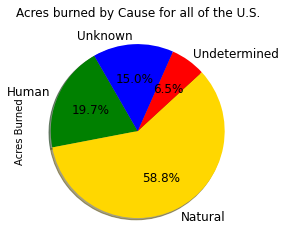

In [7]:
# Create Pie Graph for Fires burned by Cause for all of the U.S.
pie_chart = cause_group_df.plot(kind="pie", y="Acres Burned",title = "Acres burned by Cause for all of the U.S.", 
                              startangle = 120, autopct='%1.1f%%', shadow=True, 
                              fontsize=12, colors=("green","gold", "red", "blue"), legend=False)

plt.show()

In [8]:
# Filter dataset for Colorado Data only

CO_firedata_df = firedata_df[firedata_df["State"].isin(["CO"])]
CO_firedata_df.head()

,Unnamed: 0,Index,Fire ID,Cause,Latitude,Longitude,Country,State,Acres Burned,Discovery Year,Discovery Month,Discovery Day,Out Year,Out Month,Out Day
14,28,30,2015-COGWD-000216,Human,39.622206,-106.904911,US,CO,0.1,2015,7,5,2015,7,5
15,29,31,2019-COMFX-000187,Human,40.239896,-108.895411,US,CO,90.0,2019,7,28,2019,7,28
19,33,35,2018-COUPD-000251,Unknown,38.145376,-108.552111,US,CO,0.1,2018,7,28,2018,7,28
22,37,41,2017-COWRD-000097,Undetermined,39.860576,-108.318411,US,CO,1.0,2017,6,12,2017,6,12
45,86,94,2015-COGRX-000446,Natural,39.921107,-106.136210,US,CO,0.2,2015,9,25,2015,9,25


In [9]:
# Sum Acreage by Fire Cause for Colorado Only
cause_group_CO = CO_firedata_df.groupby("Cause")
cause_group_CO_df = pd.DataFrame(cause_group_CO["Acres Burned"].sum())
cause_group_CO_df

,Acres Burned
Cause,
Human,440413.580
Natural,276125.385
Undetermined,24183.890
Unknown,271008.720


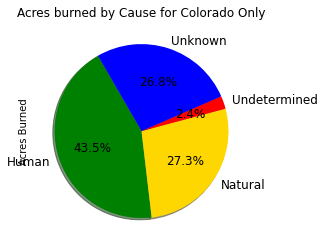

In [10]:
# Create Pie Graph for Fires burned by Cause for Colorado Only
pie_chart = cause_group_CO_df.plot(kind="pie", y="Acres Burned",title = "Acres burned by Cause for Colorado Only", 
                              startangle = 120, autopct='%1.1f%%', shadow=True, 
                              fontsize=12, colors=("green","gold", "red", "blue"), legend=False)

plt.show()

In [23]:
# Filter CO Firedata for 2015-2019

CO_firedata_recent_df = CO_firedata_df[CO_firedata_df["Discovery Year"].isin(["2015", "2016", "2017", "2018", "2019"])]
CO_firedata_recent_df.head()

,Unnamed: 0,Index,Fire ID,Cause,Latitude,Longitude,Country,State,Acres Burned,Discovery Year,Discovery Month,Discovery Day,Out Year,Out Month,Out Day
14,28,30,2015-COGWD-000216,Human,39.622206,-106.904911,US,CO,0.1,2015,7,5,2015,7,5
15,29,31,2019-COMFX-000187,Human,40.239896,-108.895411,US,CO,90.0,2019,7,28,2019,7,28
19,33,35,2018-COUPD-000251,Unknown,38.145376,-108.552111,US,CO,0.1,2018,7,28,2018,7,28
22,37,41,2017-COWRD-000097,Undetermined,39.860576,-108.318411,US,CO,1.0,2017,6,12,2017,6,12
45,86,94,2015-COGRX-000446,Natural,39.921107,-106.136210,US,CO,0.2,2015,9,25,2015,9,25


In [24]:
# Count Number of Fires by Year for Colorado Only
count_fires_CO = CO_firedata_recent_df.groupby("Discovery Year")
count_fires_CO_df = pd.DataFrame(count_fires_CO["Fire ID"].count())

# Rename column for Number of Fires
count_fires_CO_renamed_df = count_fires_CO_df.rename(columns = {"Fire ID":"Number of Fires"})

count_fires_CO_renamed_df


,Number of Fires
Discovery Year,
2015,602
2016,954
2017,794
2018,1196
2019,802


In [25]:
# Convert index to column

index = count_fires_CO_renamed_df.index
index

Int64Index([2015, 2016, 2017, 2018, 2019], dtype='int64', name='Discovery Year')

Text(0.5, 1.0, 'Number of Fires by Year in Colorado')

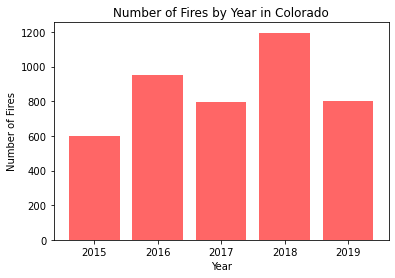

In [26]:
# Create Bar chart for Number of Fires in Colorado by year

x_axis=index
y_axis=count_fires_CO_renamed_df["Number of Fires"]
plt.bar(x_axis, y_axis, color='r', alpha=0.6, align='center')
plt.xlabel("Year")
plt.ylabel("Number of Fires")
plt.title("Number of Fires by Year in Colorado")


In [27]:
# Sum total Acres by Year for Colorado Only
sum_acres_CO = CO_firedata_recent_df.groupby("Discovery Year")
sum_acres_CO_df = pd.DataFrame(sum_acres_CO["Acres Burned"].sum())

# Rename column for Number of Fires
#count_fires_CO_renamed_df = count_fires_CO_df.rename(columns = {"Fire ID":"Number of Fires"})

sum_acres_CO_df

,Acres Burned
Discovery Year,
2015,10177.700
2016,110153.095
2017,67968.940
2018,495431.910
2019,38173.540


In [28]:
# Convert index to column

index2 = sum_acres_CO_df.index
index2

Int64Index([2015, 2016, 2017, 2018, 2019], dtype='int64', name='Discovery Year')

Text(0.5, 1.0, 'Total Acres Burned by Year in Colorado')

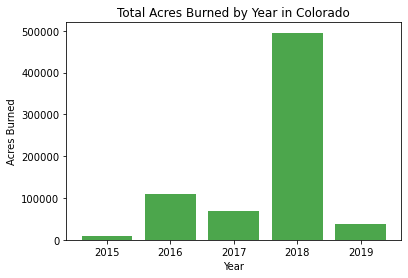

In [29]:
# Create Bar chart for Total Acres burned in Colorado by year

x_axis=index2
y_axis=sum_acres_CO_df["Acres Burned"]
plt.bar(x_axis, y_axis, color='g', alpha=0.7, align='center')
plt.xlabel("Year")
plt.ylabel("Acres Burned")
plt.title("Total Acres Burned by Year in Colorado")


In [30]:
# Average Acres by fire by Year for Colorado Only
avg_acres_CO = CO_firedata_recent_df.groupby("Discovery Year")
avg_acres_CO_df = pd.DataFrame(avg_acres_CO["Acres Burned"].mean())
avg_acres_CO_df 

,Acres Burned
Discovery Year,
2015,16.906478
2016,115.464460
2017,85.603199
2018,414.240727
2019,47.597930


In [31]:
# Filter CO Firedata for 2020

CO_firedata_2020_df = CO_firedata_df[CO_firedata_df["Discovery Year"].isin(["2020"])]
CO_firedata_2020_df

,Unnamed: 0,Index,Fire ID,Cause,Latitude,Longitude,Country,State,Acres Burned,Discovery Year,Discovery Month,Discovery Day,Out Year,Out Month,Out Day
72,124,136,2020-COWRD-000323,Natural,39.858486,-108.193611,US,CO,0.1,2020,8,29,2020,8,29
140,235,256,2020-COSJF-000356,Human,37.393616,-108.068911,US,CO,0.1,2020,6,7,2020,6,7
254,440,484,2020-COSJF-001214,Unknown,37.806806,-107.774211,US,CO,597.8,2020,10,19,2020,10,19
258,446,491,2020-COUPD-000124,Natural,38.268496,-108.656011,US,CO,0.1,2020,7,4,2020,7,4
461,813,895,2020-COPSF-000055,Unknown,38.899946,-105.441010,US,CO,11.0,2020,1,29,2020,1,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97138,169458,189343,2020-COPSF-000495,Human,38.838726,-106.219310,US,CO,0.1,2020,5,23,2020,5,23
97212,169594,189497,2020-COPSF-001605,Human,38.554116,-106.300310,US,CO,0.1,2020,8,4,2020,8,4
97631,170348,190346,2020-COUPD-000264,Unknown,38.324316,-108.992111,US,CO,1.0,2020,9,29,2020,9,29
97789,170628,190653,2020-COSUA-000123,Natural,37.044296,-107.385410,US,CO,0.1,2020,5,12,2020,5,12


In [32]:
COsorted_df = CO_firedata_2020_df.sort_values("Acres Burned", ascending=False)
COsorted_df.head()

,Unnamed: 0,Index,Fire ID,Cause,Latitude,Longitude,Country,State,Acres Burned,Discovery Year,Discovery Month,Discovery Day,Out Year,Out Month,Out Day
86927,151688,169564,2020-COGRD-000307,Unknown,39.336216,-108.525511,US,CO,139007.0,2020,7,31,2020,7,31
62065,108597,121329,2020-COWRF-000348,Unknown,39.566546,-107.271511,US,CO,32431.0,2020,8,10,2020,8,10
25697,44858,50183,2020-WYMRF-000353,Natural,40.628346,-106.795611,US,CO,20517.0,2020,9,6,2020,9,6
44503,77680,86705,2020-COARF-000641,Unknown,39.851246,-106.064810,US,CO,14833.0,2020,8,14,2020,8,14
81157,141673,158333,2020-COLSX-000431,Natural,37.367446,-103.450209,US,CO,11828.0,2020,5,20,2020,5,20
